In [2]:
!pip install torchsummary
!pip install tqdm

/usr/bin/sh: 1: pip: not found
/usr/bin/sh: 1: pip: not found


In [7]:
# importing the libraries
from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import random

ModuleNotFoundError: No module named 'tqdm'

In [3]:
# # loading images
# train_img = []
# for img_name in tqdm(data['image_names']):
#     image_path = 'emergency_vs_non-emergency_dataset/images/' + img_name
#     img = imread(image_path)
#     img = img/255
#     train_img.append(img)

# train_x = np.array(train_img)
# train_y = data['emergency_or_not'].values
# train_x.shape, train_y.shape

In [6]:
import cv2
import os
import glob
img_dir = "face_images/*"
files = glob.glob(img_dir)
data = []

for f1 in files:
    img = imread(f1)
    img = img/255
    data.append(img)

train_x = np.array(data)
train_x.shape

NameError: name 'np' is not defined

In [5]:
train_x, val_x= train_test_split(train_x, test_size = 0.1, random_state = 13)
(train_x.shape), (val_x.shape)

((675, 128, 128, 3), (75, 128, 128, 3))

In [6]:
train_x[1,:,:].shape

(128, 128, 3)

In [7]:
from skimage.color import rgb2gray

In [8]:
#https://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image
def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

In [9]:
# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [10]:
final_train_data = []
final_target_train = []

for i in tqdm(range(train_x.shape[0])):
    
    final_train_data.append(rgb2gray(train_x[i]))
                            
    final_train_data.append(random.uniform(0.6,1.01)*train_x[i,:,:])

    final_train_data.append(train_x[i])
    
    final_train_data.append(rotate(train_x[i], angle=45, mode = 'wrap'))
    
    final_train_data.append(np.fliplr(train_x[i]))
    
    final_train_data.append(np.flipud(train_x[i]))
    
#     final_train_data.append(random_noise(train_x[i],var=0.2**2))
    

100%|██████████| 675/675 [00:00<00:00, 823.35it/s]


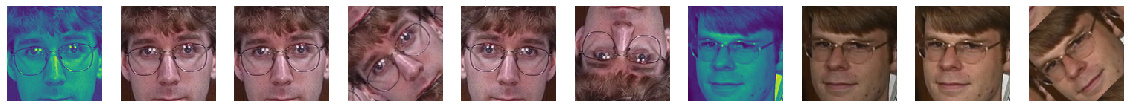

In [11]:
fig,ax = plt.subplots(nrows=1,ncols=10,figsize=(20,20))
for i in range(10):
   
    ax[i].imshow(final_train_data[i+30])
    #x[i].imshow(final_train_data[i+30])
    ax[i].axis('off')